In [54]:
# Import 3rd party packages

using DifferentialEquations, StochasticDiffEq, LinearAlgebra, Calculus, Discretizers, KernelDensity, Distributions
using JLD2, FileIO, DataFrames, LaTeXStrings;
using DelimitedFiles,CSV, Query;
using Plots;

In [65]:
# v(x) = a1*(x-1.5)^4/4 - b1*(x-1.5)^3/3 - c1*(x-1.5)^2/2 - d1
# v'(x) = a1*(x-1.5)^3 - b1*(x-1.5)^2 - c1*(x-1.5) - d1
# f(x) = -v'(x)
#f(x) = -a1*(x-1.5)^3 + b1*(x-1.5)^2 + c1*(x-1.5) + d1

In [66]:
a1=1.0
b1=0.0
c1=1.0
d1=0.1

0.1

In [ ]:
##################################################
# ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
##################################################

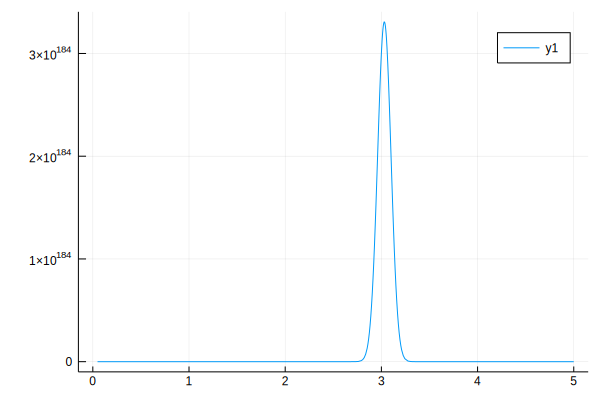

In [170]:
α=0.08


psx(x) = exp(-2log(x) + (2*-a1*x^2)/(2*α^2) + ((2*4.5*a1 + b1)*x)/α^2 + 
        (2*(-6.75*a1 - 3*b1 + c1)*log(abs(x)))/α^2 + 2*(-2*(3.375*a1 + 2.25*b1 - 1.5*c1 + d1)/(x*α^2)))
plot(psx)

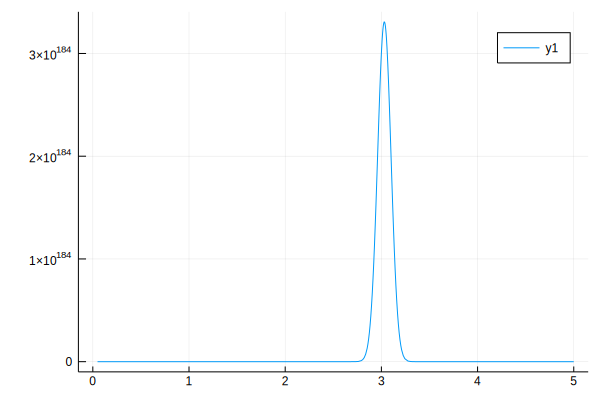

In [171]:
α=0.08


psx(x) = exp(-2log(x) + (2*-a1*x^2)/(2*α^2) + ((2*4.5*a1 + b1)*x)/α^2 + 
        (2*(-6.75*a1 - 3*b1 + c1)*log(abs(x)))/α^2 + 2*(-2*(3.375*a1 + 2.25*b1 - 1.5*c1 + d1)/(x*α^2)))
plot(psx)

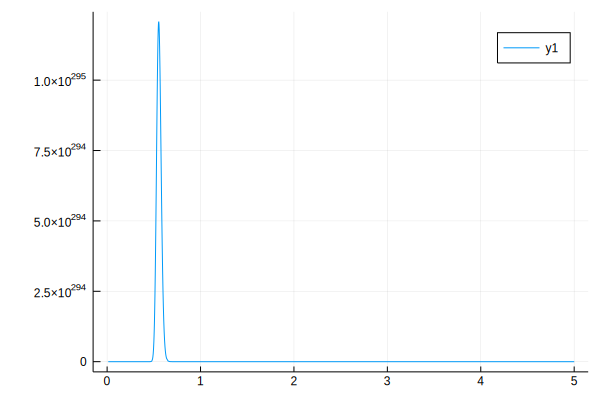

In [172]:
# Trying to fix

α=0.08

psx(x) = exp(-2log(x) + (-a1*x^2)/(α^2) + (4.5*a1+b1)*x*2/(α^2) + (2*(-6.75*a1-3*b1+c1)*(log(abs(x))))/(α^2) 
        + 2*(-3.375*a1-2.25*b1+1.5*c1-d1)/(α^2*x))
    
    
    
plot(psx)

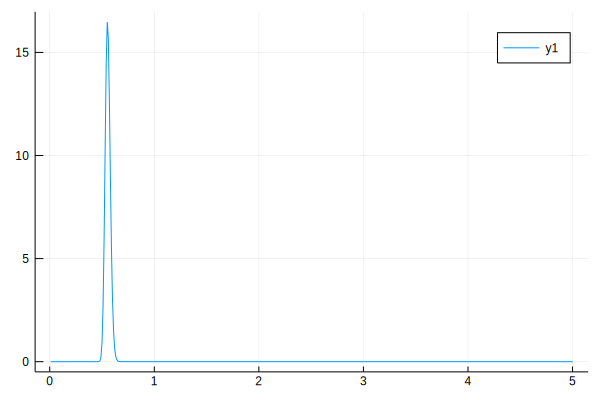

In [167]:
x = collect(0.01:0.01:5.0)
psx_norm = psx.(x)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x,psx_norm)

In [133]:
#############################################################
# NORMALISED ANALYTICAL STEADY STATE PROBABILITY DISTRIBUTION
#############################################################

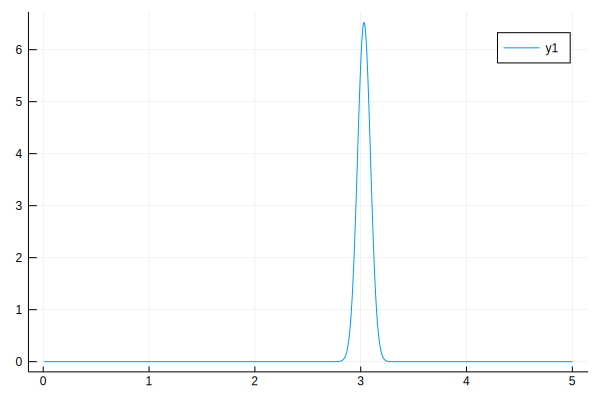

In [142]:
x = collect(0.01:0.01:5.0)
psx_norm = psx.(x)
psx_norm = psx_norm./(0.01*sum(psx_norm)) 
plot(x,psx_norm)

In [71]:
# The same issue arises where the solution is not defined at multiple values...

In [106]:
# Plot landscape
# U = -log(Psx)
α = 0.1
land(x) = (2log(x) - (2*-a1*x^2)/(2*α^2) - ((2*4.5*a1 + b1)*x)/α^2 - 
        (2*(-6.75*a1 - 3*b1 + c1)*log(abs(x)))/α^2 - 2*(-2*(3.375*a1 + 2.25*b1 - 1.5*c1 + d1)/(x*α^2)))

plot(land,yaxis=:log)

DomainError: DomainError with -10.35812790773059:
NaN result for non-NaN input.